In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
df = pd.read_excel('Микроэкономика_промежуточный_уровень.xlsx') # читаем
df

,Student ID,Grade,Grade percent,Тесты 1: Тест 1 - Тест 1.1. (Earned),Тесты 1: Тест 1 - Тест 1.1. (Possible),Тесты 1: Тест 1 - Тест 1.2. (Earned),Тесты 1: Тест 1 - Тест 1.2. (Possible),Тесты 1: Тест 1 - Тест 1.3. (Earned),Тесты 1: Тест 1 - Тест 1.3. (Possible),Тесты 1: Тест 1 - Тест 1.4 (Earned),...,Тесты 13: Тест 13 - Тест 13.13 (Earned),Тесты 13: Тест 13 - Тест 13.13 (Possible),Тесты 13: Тест 13 - Тест 13.14 (Earned),Тесты 13: Тест 13 - Тест 13.14 (Possible),Тесты 13: Тест 13 - Тест 13.15 (Earned),Тесты 13: Тест 13 - Тест 13.15 (Possible),Тесты 13: Тест 13 - Тест 13.16 (Earned),Тесты 13: Тест 13 - Тест 13.16 (Possible),Тесты 13: Тест 13 - Тест 13.17 (Earned),Тесты 13: Тест 13 - Тест 13.17 (Possible)
0,1,0.70,70.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,2,0.93,93.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,0.69,69.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
3,4,0.58,58.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,5,0.62,62.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,81,0.01,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,...,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0
81,82,0.03,3.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,...,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0
82,83,0.03,3.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,...,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0
83,84,0.04,4.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,...,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0,Not Attempted,1.0


In [3]:
# будем брать задания второго теста:
names = ['Student ID']
for i in range(1,18):
    names.append(f'Тесты 2: Тест 2 - Тест 2.{i}. (Earned)')
df = df[names]
df = df.replace('Not Attempted', np.nan) # всем, кто не приступал, даем nan

In [4]:
df = df.dropna() # убираем все строки с нан

In [5]:
df[names[1:]] = df[names[1:]].apply(pd.to_numeric) # баллы в ячейках были строкой (переводим в числа)

In [6]:
summa = np.zeros(63)
for i in range(1, 18):
    summa += df[names[i]]
df['Суммарный балл (из 17)'] = summa # делаем колонку суммарного балла
df

,Student ID,Тесты 2: Тест 2 - Тест 2.1. (Earned),Тесты 2: Тест 2 - Тест 2.2. (Earned),Тесты 2: Тест 2 - Тест 2.3. (Earned),Тесты 2: Тест 2 - Тест 2.4. (Earned),Тесты 2: Тест 2 - Тест 2.5. (Earned),Тесты 2: Тест 2 - Тест 2.6. (Earned),Тесты 2: Тест 2 - Тест 2.7. (Earned),Тесты 2: Тест 2 - Тест 2.8. (Earned),Тесты 2: Тест 2 - Тест 2.9. (Earned),Тесты 2: Тест 2 - Тест 2.10. (Earned),Тесты 2: Тест 2 - Тест 2.11. (Earned),Тесты 2: Тест 2 - Тест 2.12. (Earned),Тесты 2: Тест 2 - Тест 2.13. (Earned),Тесты 2: Тест 2 - Тест 2.14. (Earned),Тесты 2: Тест 2 - Тест 2.15. (Earned),Тесты 2: Тест 2 - Тест 2.16. (Earned),Тесты 2: Тест 2 - Тест 2.17. (Earned),Суммарный балл (из 17)
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
1,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
2,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
3,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,16.0
4,5,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
72,73,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,12.0
73,74,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
74,75,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.0


In [7]:
df['Суммарный балл (из 17)'].value_counts()

17.0    22
15.0     7
11.0     7
16.0     6
12.0     4
10.0     4
14.0     3
7.0      3
9.0      3
13.0     2
2.0      1
4.0      1
Name: Суммарный балл (из 17), dtype: int64

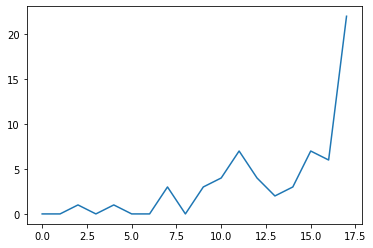

In [8]:

plt.plot(np.arange(0, 18), [0, 0, 1, 0, 1, 0, 0, 3, 0, 3, 4, 7, 4, 2, 3, 7, 6, 22]) # не догадался,
                                                                                    # как сделать быстрее, 
                                                                                    # поэтому так тупо)


Это точно не нормальное распределение.

In [9]:
# cчитаю коэфф дискриминативности (вроде он зовется бисерный коэф)
def discr(i):
    x1_sred = df[df[f'Тесты 2: Тест 2 - Тест 2.{i}. (Earned)'] == 1]['Суммарный балл (из 17)'].mean()
    x0_sred = df[df[f'Тесты 2: Тест 2 - Тест 2.{i}. (Earned)'] == 0]['Суммарный балл (из 17)'].mean()
    n1 = (df[f'Тесты 2: Тест 2 - Тест 2.{i}. (Earned)'] == 1).sum()
    n0 = (df[f'Тесты 2: Тест 2 - Тест 2.{i}. (Earned)'] == 0).sum()
    n = n1 + n0
    s = np.std(df[f'Тесты 2: Тест 2 - Тест 2.{i}. (Earned)'])
    n_coef = n1 * n0 / (n *(n-1))
    r = (x1_sred - x0_sred) * n_coef ** 2 / s
    return r

In [10]:
discr(1) # считаем коэф для первого задания

0.3995471545941353

In [11]:
all_discr = {}
for i in range(1, 18):
    all_discr[i] = discr(i)

ds = pd.DataFrame.from_dict(all_discr, orient='index')
ds = ds.rename(columns={0 : 'Коэффициент дискриминативности'})
ds

,Коэффициент дискриминативности
1,0.399547
2,0.130302
3,0.443545
4,0.056010
5,0.188045
6,0.138797
7,0.566568
8,0.395132
9,0.436899
10,0.314249


In [12]:
df.sum() # просто смотрю где больше правильных ответов

Student ID                               2320.0
Тесты 2: Тест 2 - Тест 2.1. (Earned)       48.0
Тесты 2: Тест 2 - Тест 2.2. (Earned)       58.0
Тесты 2: Тест 2 - Тест 2.3. (Earned)       44.0
Тесты 2: Тест 2 - Тест 2.4. (Earned)       60.0
Тесты 2: Тест 2 - Тест 2.5. (Earned)       55.0
Тесты 2: Тест 2 - Тест 2.6. (Earned)       59.0
Тесты 2: Тест 2 - Тест 2.7. (Earned)       42.0
Тесты 2: Тест 2 - Тест 2.8. (Earned)       52.0
Тесты 2: Тест 2 - Тест 2.9. (Earned)       50.0
Тесты 2: Тест 2 - Тест 2.10. (Earned)      52.0
Тесты 2: Тест 2 - Тест 2.11. (Earned)      33.0
Тесты 2: Тест 2 - Тест 2.12. (Earned)      57.0
Тесты 2: Тест 2 - Тест 2.13. (Earned)      37.0
Тесты 2: Тест 2 - Тест 2.14. (Earned)      50.0
Тесты 2: Тест 2 - Тест 2.15. (Earned)      58.0
Тесты 2: Тест 2 - Тест 2.16. (Earned)      54.0
Тесты 2: Тест 2 - Тест 2.17. (Earned)      53.0
Суммарный балл (из 17)                    862.0
dtype: float64

Посчитаем другой коэфф дискр

In [13]:
df = df.sort_values(by='Суммарный балл (из 17)')

In [14]:
df_first = df.tail(17) # 27% лучших (от 63)
df_last = df.head(17) # 27% худших (от 63)
df_first

,Student ID,Тесты 2: Тест 2 - Тест 2.1. (Earned),Тесты 2: Тест 2 - Тест 2.2. (Earned),Тесты 2: Тест 2 - Тест 2.3. (Earned),Тесты 2: Тест 2 - Тест 2.4. (Earned),Тесты 2: Тест 2 - Тест 2.5. (Earned),Тесты 2: Тест 2 - Тест 2.6. (Earned),Тесты 2: Тест 2 - Тест 2.7. (Earned),Тесты 2: Тест 2 - Тест 2.8. (Earned),Тесты 2: Тест 2 - Тест 2.9. (Earned),Тесты 2: Тест 2 - Тест 2.10. (Earned),Тесты 2: Тест 2 - Тест 2.11. (Earned),Тесты 2: Тест 2 - Тест 2.12. (Earned),Тесты 2: Тест 2 - Тест 2.13. (Earned),Тесты 2: Тест 2 - Тест 2.14. (Earned),Тесты 2: Тест 2 - Тест 2.15. (Earned),Тесты 2: Тест 2 - Тест 2.16. (Earned),Тесты 2: Тест 2 - Тест 2.17. (Earned),Суммарный балл (из 17)
23,24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
22,23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
67,68,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
21,22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
20,21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
63,64,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
19,20,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
16,17,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
6,7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
57,58,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0


In [15]:
p_first = np.array(df_first[names[1:]].mean())
p_last = np.array(df_last[names[1:]].mean())
ds['Другой коэфф дискр'] = p_first - p_last
ds

,Коэффициент дискриминативности,Другой коэфф дискр
1,0.399547,0.588235
2,0.130302,0.176471
3,0.443545,0.588235
4,0.056010,0.176471
5,0.188045,0.294118
6,0.138797,0.235294
7,0.566568,0.823529
8,0.395132,0.647059
9,0.436899,0.647059
10,0.314249,0.529412


Теперь по коэффициентам оценим качество теста (классификацию брал из рассмотренных статей)

In [16]:
def score1(a):
    if a <= 0:
        return 'Непригодно'
    elif a < 0.2:
        return 'Кандидат на удаление'
    elif a >= 0.3:
        return 'Отлично'
    else:
        return "Норм"
    
ds['Итог1'] = ds['Коэффициент дискриминативности'].apply(score1)
ds

,Коэффициент дискриминативности,Другой коэфф дискр,Итог1
1,0.399547,0.588235,Отлично
2,0.130302,0.176471,Кандидат на удаление
3,0.443545,0.588235,Отлично
4,0.056010,0.176471,Кандидат на удаление
5,0.188045,0.294118,Кандидат на удаление
6,0.138797,0.235294,Кандидат на удаление
7,0.566568,0.823529,Отлично
8,0.395132,0.647059,Отлично
9,0.436899,0.647059,Отлично
10,0.314249,0.529412,Отлично


In [17]:
ds['Валидно?'] = ds['Коэффициент дискриминативности'].apply(lambda x: 'Да' if x >= 0.5 else 'Нет')
ds

,Коэффициент дискриминативности,Другой коэфф дискр,Итог1,Валидно?
1,0.399547,0.588235,Отлично,Нет
2,0.130302,0.176471,Кандидат на удаление,Нет
3,0.443545,0.588235,Отлично,Нет
4,0.056010,0.176471,Кандидат на удаление,Нет
5,0.188045,0.294118,Кандидат на удаление,Нет
6,0.138797,0.235294,Кандидат на удаление,Нет
7,0.566568,0.823529,Отлично,Да
8,0.395132,0.647059,Отлично,Нет
9,0.436899,0.647059,Отлично,Нет
10,0.314249,0.529412,Отлично,Нет


In [18]:
def score2(a):
    if a < 0.19:
        return 'Требует переработки'
    elif a <= 0.29:
        return 'Требует анализа'
    elif a <= 0.39:
        return 'Удовлетворительно'
    else:
        return 'Эффективно'
    
ds['Итог2'] = ds['Другой коэфф дискр'].apply(score2)
ds

,Коэффициент дискриминативности,Другой коэфф дискр,Итог1,Валидно?,Итог2
1,0.399547,0.588235,Отлично,Нет,Эффективно
2,0.130302,0.176471,Кандидат на удаление,Нет,Требует переработки
3,0.443545,0.588235,Отлично,Нет,Эффективно
4,0.056010,0.176471,Кандидат на удаление,Нет,Требует переработки
5,0.188045,0.294118,Кандидат на удаление,Нет,Удовлетворительно
6,0.138797,0.235294,Кандидат на удаление,Нет,Требует анализа
7,0.566568,0.823529,Отлично,Да,Эффективно
8,0.395132,0.647059,Отлично,Нет,Эффективно
9,0.436899,0.647059,Отлично,Нет,Эффективно
10,0.314249,0.529412,Отлично,Нет,Эффективно


# Спирмен-Браун

In [19]:
df

,Student ID,Тесты 2: Тест 2 - Тест 2.1. (Earned),Тесты 2: Тест 2 - Тест 2.2. (Earned),Тесты 2: Тест 2 - Тест 2.3. (Earned),Тесты 2: Тест 2 - Тест 2.4. (Earned),Тесты 2: Тест 2 - Тест 2.5. (Earned),Тесты 2: Тест 2 - Тест 2.6. (Earned),Тесты 2: Тест 2 - Тест 2.7. (Earned),Тесты 2: Тест 2 - Тест 2.8. (Earned),Тесты 2: Тест 2 - Тест 2.9. (Earned),Тесты 2: Тест 2 - Тест 2.10. (Earned),Тесты 2: Тест 2 - Тест 2.11. (Earned),Тесты 2: Тест 2 - Тест 2.12. (Earned),Тесты 2: Тест 2 - Тест 2.13. (Earned),Тесты 2: Тест 2 - Тест 2.14. (Earned),Тесты 2: Тест 2 - Тест 2.15. (Earned),Тесты 2: Тест 2 - Тест 2.16. (Earned),Тесты 2: Тест 2 - Тест 2.17. (Earned),Суммарный балл (из 17)
51,52,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
31,32,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
58,59,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,7.0
33,34,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,7.0
50,51,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
14,15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
9,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0
13,14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0


In [20]:
nechet = deepcopy(df['Тесты 2: Тест 2 - Тест 2.1. (Earned)'])
for i in range(3, 18, 2):
    nechet += deepcopy(df[f'Тесты 2: Тест 2 - Тест 2.{i}. (Earned)'])
chet = deepcopy(df['Суммарный балл (из 17)']) - nechet
chet

51    1.0
31    0.0
58    5.0
33    6.0
50    6.0
     ... 
24    8.0
14    8.0
9     8.0
13    8.0
0     8.0
Length: 63, dtype: float64

# Числитель

In [21]:
n =  len(chet)
sum1 = np.sum(chet * nechet)
sum2 = np.sum(chet)
sum3 = np.sum(nechet)
chislitel = n * sum1 - sum2 * sum3
chislitel

9975.0

# Знаменатель

In [22]:
summ1 = np.sum(chet ** 2)
summ2 = np.sum(chet) ** 2
summ3 = np.sum(nechet ** 2)
summ4 = np.sum(nechet) ** 2
znamenatel = np.sqrt((n * summ1 - summ2)*(n * summ3 - summ4))
znamenatel

15029.998802395161

In [23]:
r12 = chislitel / znamenatel

In [24]:
# коррекция
rt = 2 * r12 / (1 + r12)
rt

0.7978404701258791

In [25]:
# получает на вход номер теста -> считает коэфф

def spB(a):
    
    dff = pd.read_excel('Микроэкономика_промежуточный_уровень.xlsx')
    namess = ['Student ID']
    for i in range(1,18):
        namess.append(f'Тесты {a}: Тест {a} - Тест {a}.{i} (Earned)')
    dff = dff.replace('Not Attempted', np.nan)
    dff = dff[namess]
    dff.dropna(inplace = True)
    dff[namess[1:]] = dff[namess[1:]].apply(pd.to_numeric)
    
    nechet = deepcopy(dff[f'Тесты {a}: Тест {a} - Тест {a}.1 (Earned)'])
    for i in range(3, 18, 2):
        nechet += deepcopy(dff[f'Тесты {a}: Тест {a} - Тест {a}.{i} (Earned)'])
    chet = deepcopy(dff[f'Тесты {a}: Тест {a} - Тест {a}.2 (Earned)'])
    for i in range(2, 18, 2):
        chet += deepcopy(dff[f'Тесты {a}: Тест {a} - Тест {a}.{i} (Earned)'])
        
    n =  len(chet)
    
    sum1 = np.sum(chet * nechet)
    sum2 = np.sum(chet)
    sum3 = np.sum(nechet)
    chislitel = n * sum1 - sum2 * sum3
    
    
    summ1 = np.sum(chet ** 2)
    summ2 = np.sum(chet) ** 2
    summ3 = np.sum(nechet ** 2)
    summ4 = np.sum(nechet) ** 2
    znamenatel = np.sqrt((n * summ1 - summ2) * (n * summ3 - summ4))
    r12 = chislitel / znamenatel
    
    return 2 * r12 / (1 + r12)


In [26]:
for i in range(3, 14):
    print(i, 'значение =', spB(i))

3 значение = 0.8826628184191859
4 значение = 0.8671514196513155
5 значение = 0.9243466605748905
6 значение = 0.9134370259279215
7 значение = 0.8255650109217563
8 значение = 0.9378150104076239
9 значение = 0.8573068209838851
10 значение = 0.9083650609216561
11 значение = 0.8799093740620472


KeyError: "['Тесты 12: Тест 12 - Тест 12.13 (Earned)'] not in index"

Ошибка происходит из-за разных способов названия колонки, это проблемка (можно переименовать колонки)


Коэффы от функции Сп-Бр немного не совпадают с посчитанным ранее для второго теста (вероятно, где-то что-то не дописано). Я б функции не доверял. Доработаю.